In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
#part_1.1 
# Generate a frequency table for the product `category`
pd.crosstab(df["category"],columns = "count")

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [4]:
#part_1.1 
# Which are the top 5 most listed product categories?
top_5_category = df["category"].value_counts().head(5)
top_5_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

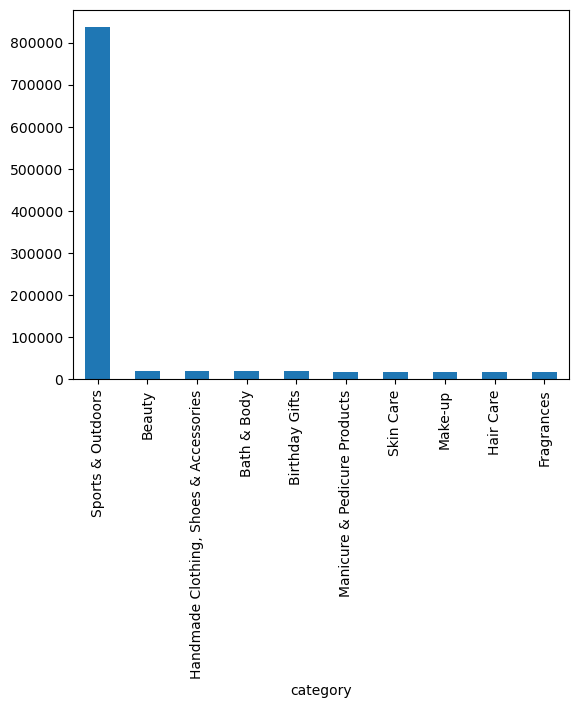

In [5]:
#part_1.2 Display the distribution of products across different categories using a bar chart
top_category = df["category"].value_counts().head(10)
top_category.plot(kind="bar", stacked=True)

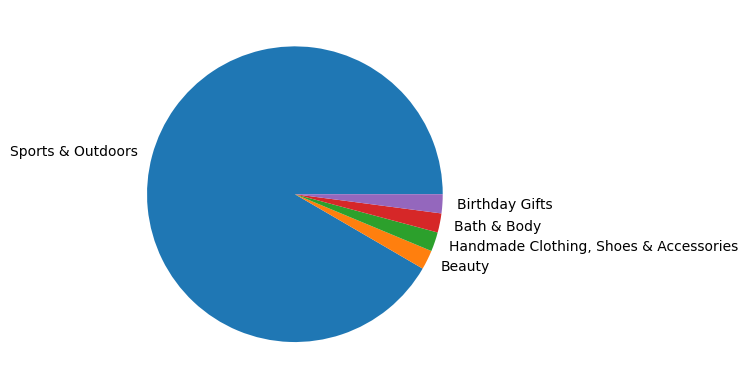

In [6]:
#part_1.2 For a subset of top categories, visualize their proportions using a pie chart
fig, ax = plt.subplots()
ax.pie(top_5_category.values, labels = top_5_category.index)
plt.show()
#Sports & Outdoor category is dominating

In [7]:
# Part 2.1 Calculate the mean, median, and mode for the `price` of products
print("Mean of product price :", df["price"].mean())
print("Median of product price :", df["price"].median())
print("Mode of product price :", df["price"].mode()[0])

#What's the average price point of products listed? How does this compare with the most common price point (mode)
print("Average price comparing with most common price :", df["price"].mean() - df["price"].mode()[0])

Mean of product price : 89.24380943923663
Median of product price : 19.09
Mode of product price : 9.99
Average price comparing with most common price : 79.25380943923663


In [8]:
# Part 2.2 Determine the variance, standard deviation, range, and interquartile range for product price.
print("var_price :", df["price"].var())
print("std_price :", df["price"].std())

min_price = df["price"].min()
max_price = df["price"].max()

print("range_price: ", max_price - min_price)
print("quantiles_price :", df["price"].quantile([0.25,0.50,0.75]) )  

var_price : 119445.48532256528
std_price : 345.60886175352226
range_price:  100000.0
quantiles_price : 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


c:\Users\Amira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


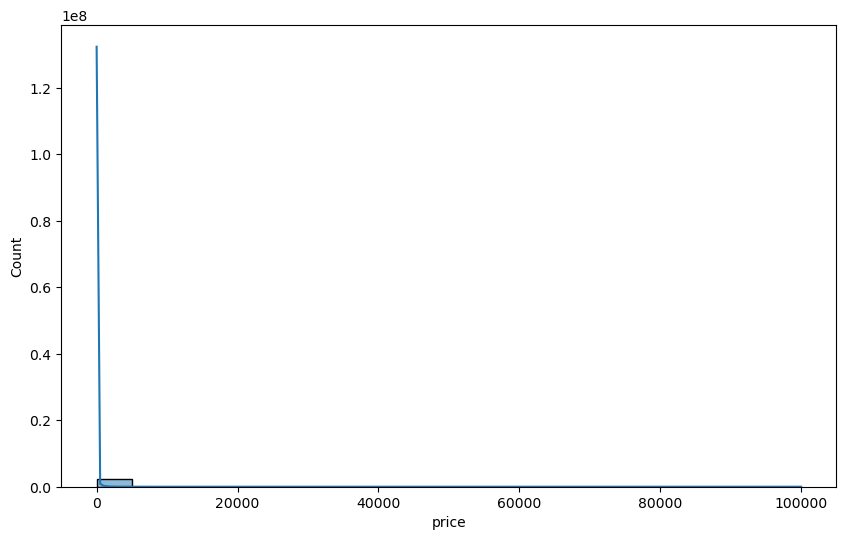

In [9]:
# Part 2.3
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices.
plt.figure(figsize=(10,6))
sns.histplot(df["price"], kde = True, bins = 20)
df["price"].skew()
plt.show()

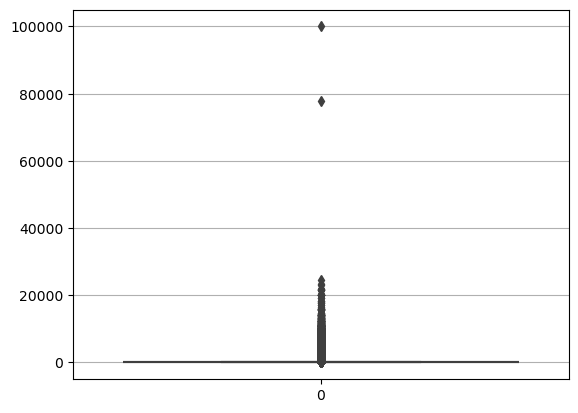

In [11]:
#Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing
sns.boxplot(data = df["price"])
plt.grid(axis="y")
plt.show()

#there are some product which cost 80k or 100k. Clearly outliers.

In [14]:
# Part 3.1 Calculate the mean, median, and mode for the `rating` of products
print("Mean of product rating :", df["stars"].mean())
print("Median of product rating :", df["stars"].median())
print("Mode of product rating :", df["stars"].mode()[0])

Mean of product rating : 2.152836472966065
Median of product rating : 0.0
Mode of product rating : 0.0


In [16]:
#How do customers generally rate products? Is there a common trend?

labels = ["low","medium","average","high","very high"]
pd.cut(df["stars"], bins = 5, labels= labels, )

0          very high
1          very high
2          very high
3          very high
4          very high
             ...    
2443646          low
2443647          low
2443648          low
2443649    very high
2443650    very high
Name: stars, Length: 2443651, dtype: category
Categories (5, object): ['low' < 'medium' < 'average' < 'high' < 'very high']

In [17]:
# Part 3.2 Determine the variance, standard deviation, and interquartile range for product `rating`
print("Ratings variance :", df["stars"].var())
print("Ratings std :", df["stars"].std())
print("Quantiles rating :", df["stars"].quantile([0.25,0.50,0.75]))  

Ratings variance : 4.81743402976196
Ratings std : 2.1948653785054697
Quantiles rating : 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


c:\Users\Amira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


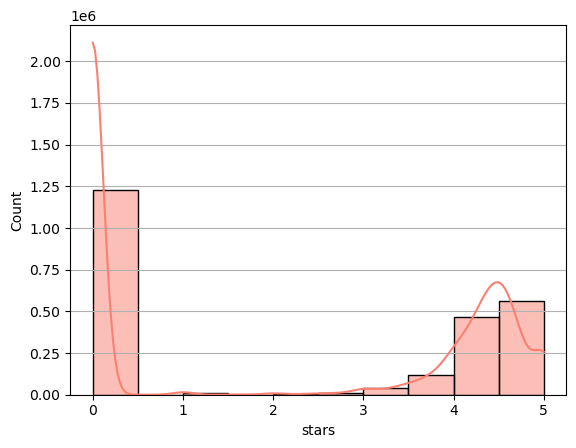

Skewness of the ratings: 0.08120735761080985


In [19]:
# Part 3.2 Calculate the skewness and kurtosis for the `rating` column.
sns.histplot(df["stars"], kde = True, bins = 10, color="salmon")
plt.grid(axis="y")
plt.show()

print("Skewness of the ratings:", df["stars"].skew() )

#the rating lean to lower values.

c:\Users\Amira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

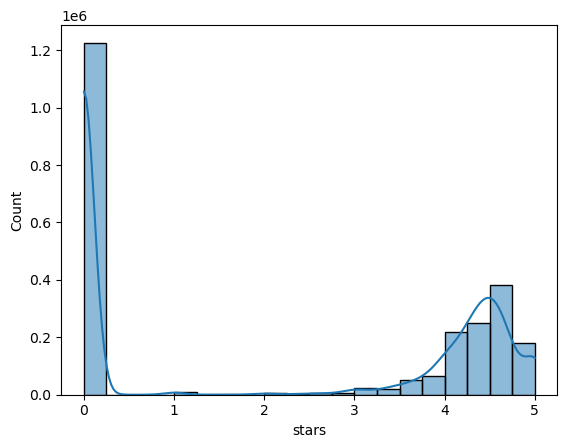

In [22]:
# Part 4 Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df["stars"],bins =20, kde=True)
# The most common rating is "0"